## Mission 1. Netfilx and Code

호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

### Mandatory Part

#### 1)한국 작품은 총 얼마나 있는가?

1. country column을 기준 

2. "South Korea"인 경우만 인정

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
netfilx = pd.read_csv("./netflix_titles.csv")

netfilx.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [133]:
netfilx_count = (netfilx["country"] == 'South Korea').value_counts()
netfilx_count[1]

199

생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.

### Bonus Part

#### 2) 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

1. country column을 기준으로 한다.
2. 단일 국가인 경우를 기준으로 결과를 구해보자.


In [134]:
netfilx['country'].value_counts().head(1)

United States    2818
Name: country, dtype: int64

## Mission 2. 가즈아! 
**날짜 오류 수정 필요**

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 Moving Average(이동평균법) 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Mandatory Part

#### 1) 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려보기

1. 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
2. x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
3. 이동평균의 기준은 Open Column으로 계산합니다.
4. 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

hint. 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [135]:
bit = pd.read_csv("./BitCoin.csv")

bit.head(5)
type(bit)

pandas.core.frame.DataFrame

In [160]:
bit_split = bit[(bit['Date'] < '2017-07')&(bit['Date']>'2016-06')] ##기간으로 자르기

bit_split.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
16,16,2017-06-09,4376.59,4617.25,4376.59,4597.12,2.172100e+09,72418700000
17,17,2017-05-09,4228.29,4427.84,3998.11,4376.53,2.697970e+09,69954400000
18,18,2017-04-09,4591.63,4591.63,4108.40,4236.31,2.987330e+09,75955500000
19,19,2017-03-09,4585.27,4714.08,4417.59,4582.96,1.933190e+09,75841700000
20,20,2017-02-09,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000


In [137]:
bit_ma5 = bit_split['Open'].rolling(5).mean() #5개의 이동평균을 구하는 코드

bit_ma5

16          NaN
17          NaN
18          NaN
19          NaN
20     4536.640
         ...   
621     421.644
622     437.018
623     451.208
624     447.574
625     444.206
Name: Open, Length: 377, dtype: float64

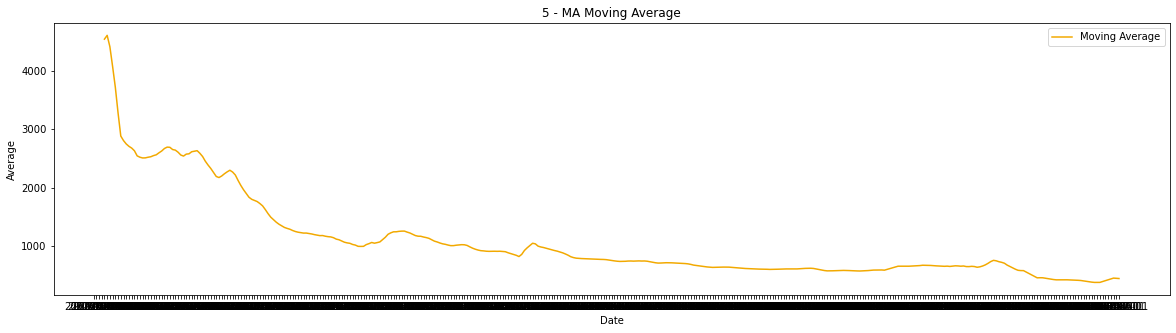

In [138]:
fig = plt.figure(figsize=(20,5))

plt.plot(bit_split.Date, bit_ma5,'#f2a900', label='Moving Average') #x축은 Date, y축은 이동평균

plt.xlabel('Date')
plt.ylabel('Average')

plt.title('5 - MA Moving Average')
plt.legend(loc='upper right')

plt.show()

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

### Bonus Part

#### 2) 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려라

1. 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
2. x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
3. 이동평균의 기준은 Open Column으로 계산합니다.
4. 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [139]:
eth = pd.read_csv("./ETH_day.csv")
eth.head(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [140]:
eth_split = eth[(eth['Date'] < '2017-07')&(eth['Date']>'2016-06')] ##기간으로 자르기

eth_split.head(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1020,2017-06-30,ETHUSD,293.80,304.94,270.77,280.80,146545.22,42337469.59
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99


In [142]:
eth_ma5 = eth_split['Open'].rolling(5).mean() #5개의 이동평균을 구하는 코드

eth_ma5

1020        NaN
1021        NaN
1022        NaN
1023        NaN
1024    285.866
         ...   
1410     14.188
1411     14.090
1412     13.970
1413     13.928
1414     13.982
Name: Open, Length: 395, dtype: float64

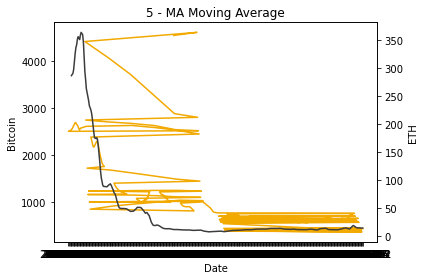

In [167]:
import matplotlib.pyplot as plt1

fig, ax = plt.subplots()
ax.plot(bit_split.Date, bit_ma5,'#f2a900', label='Bitcoin') #x축은 Date, y축은 이동평균
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin')
ax.set_title('5 - MA Moving Average')

ax1 = plt.twinx()
ax1.plot(eth_split.Date, eth_ma5,'#3c3c3d', label='ETH') #x축은 Date, y축은 이동평균
ax1.set_ylabel('ETH')

fig.tight_layout()
plt.show()